In [3]:
# IMPORT PACKAGES
from package_bfry import *

/Users/brianfry/Documents/GitHub/Bologna/package_bfry/bfry.py:285: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_2019['Area Statistica'] = income_2019['Area Statistica'].str.upper()


In [ ]:
# HOUSEHOLD SIZE
# map the household size
base_map_2019.explore(column = 'avg_household_size', cmap = 'RdBu_r', tooltip = ('zona_fiu', 'population', 'households', 'avg_household_size'), 
                                          tiles = 'CartoDB positron', legend=True)

In [ ]:
# explore gyms per 1000
amenities_2019.explore(column = 'gyms_per_1000', cmap = 'RdBu', tooltip = ('zona_fiu', 'population', 'gyms_per_1000'), 
                                          tiles = 'CartoDB positron', legend=True)

In [ ]:
# airbnb #
# base dataset : airbnb_agg

create_map(base_map_2019, airbnb_agg, 'household', 'airbnb', airbnb)

In [ ]:
# WIFI #
# base dataset : wifi_agg

# map the wifi per capita
create_map(base_map_2019, wifi_agg, 'population', 'hotspot', wifi, quotient = 1000)

In [ ]:
# PARTICIPATORY BUDGET #
# base dataset : budg_geo

    # process data for mapping
# aggregate the count of participative budget projects at the neighborhood level
# TO DO - resolve mixed geometry situation
#budg_agg = 
#gpd.overlay(base_map_2019, budg_geo, how='intersection', keep_geom_type=False) #.groupby('cod_zona').count()
#budg_agg
# rename and subset the data just to the count of the projects per neighborhood
#budg_agg = budg_agg.rename(columns={'Progetto':'project_count'})['project_count']
budg_geo.explore()
    # map the data
#create_map(base_map_2019, budg_agg, 'population', 'project', budg_geo, quotient = 1000)

In [ ]:
# explore traffic per capita at the zone level
transport_2019.explore(column = 'traffic_per_1000', cmap = 'RdBu_r')

In [ ]:
# explore bike parking per capita / household
transport_2019.explore(column = 'bike_parking_per_household', cmap = 'RdBu_r')

In [ ]:
# explore bus stops per capita
transport_2019.explore(column = 'tper_stops_per_1000', cmap = 'RdBu_r')

In [ ]:
# calculate the number of traffic coils per zone to determine the adequacy of this measurement 
base_map_2019.join(traffic_2019_geo.sjoin(base_map_2019[['geometry']]).groupby('index_right')['day_total_traffic'].count()).explore(column = 'day_total_traffic', tooltip= ('day_total_traffic'), cmap = 'RdBu_r')

In [ ]:
# MULTI VARIABLE ANALYSIS #
    # create a dataframe of variables to be analyzed together
    # can add or remove metrics for analysis as needed

In [ ]:
# plot the distribution for each variable to explore variation
for column in all_metrics:
    all_metrics[[column]].plot.hist()

In [4]:
# calculate the z-score to give a more standard frame of rereference across metrics
df_z = (all_metrics - all_metrics.mean())/all_metrics.std()

# invert selected metrics to show inverse relationships more effectively
df_z['inv_avg_household_size'] = df_z['avg_household_size']*-1
df_z.drop(columns=['avg_household_size'])

    # create a subset of just base/socioecon related metrics
df_z_socioecon = df_z[['population', '00-14', '15-29', '30-44', '45-64', '65 e oltre',
       'avg_income', 'workers_per_cap', 'students_per_cap', 'pop_density_km2',
       'inv_avg_household_size']]

    # create a subset of just transport related metrics
df_z_transport = df_z[['incident_per_1000', 'injured_per_1000',
       'injured_per_incident', 'mortality_per_1000', 'traffic_per_1000',
       'incident_per_traffic', 'bike_parking_per_1000', 'bike_m_per_capita',
       'percent_protected_bike', 'tper_stops_per_1000']]

    # create a subset of just amenities related metrics
df_z_amenities = df_z[['p_furn_good',
       'school_per_1000_child', 'furn_per_1000', 'wifi_per_1000',
       'airbnb_per_household', 'gyms_per_1000']]

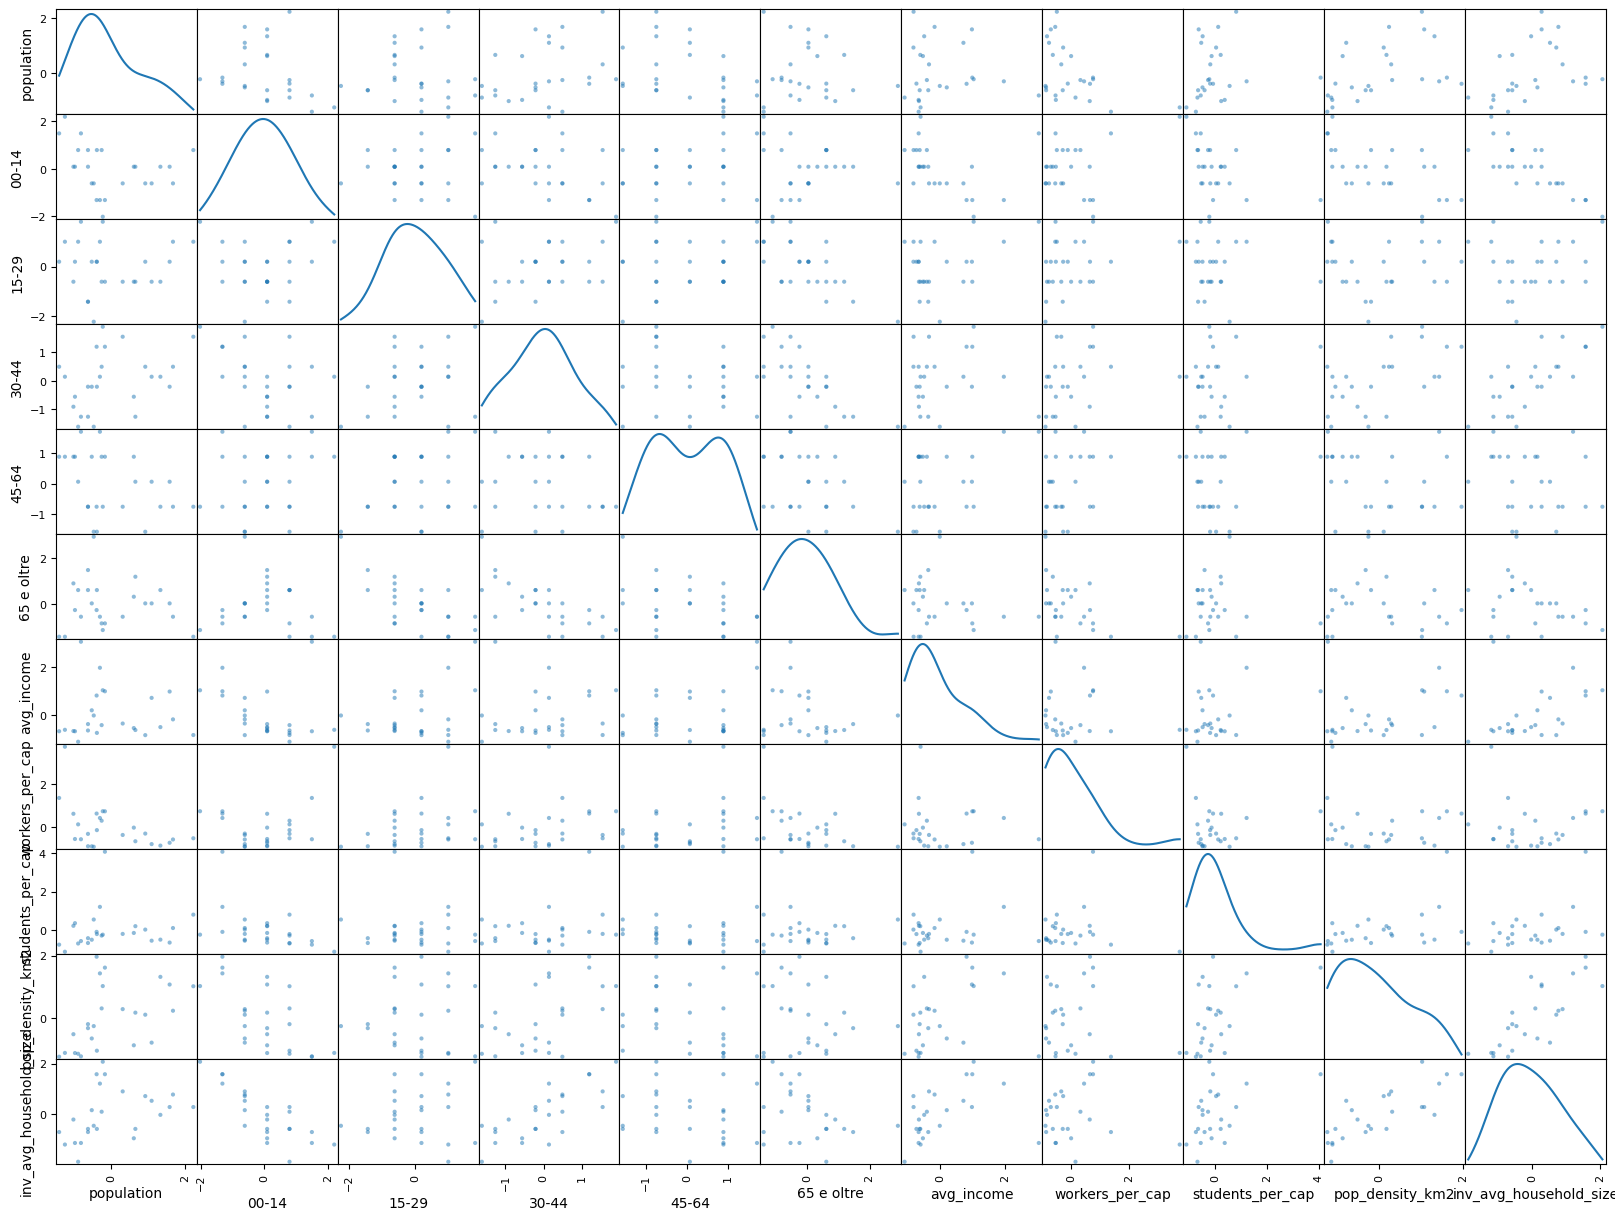

In [21]:
# scattter matrix to view distributions and correlations together
pd.plotting.scatter_matrix(df_z_socioecon, diagonal="kde",figsize=(20,15))
plt.show()
#df_z
#hinton(df_z.corr())
#df_z.corr()

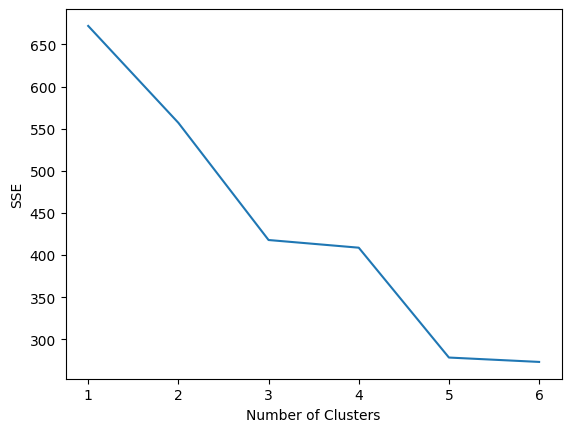

In [27]:
# visual test for best number of clusters
    # should use n-1 where n is the "elbow" of the plot where slope significantly changes
import matplotlib.pyplot as plt
%matplotlib inline

numClusters = [1,2,3,4,5,6]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(df_z)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [31]:
# display the map of the zones showing the clusters by color and limiting the tooltip to avoid noisy visualization
df_z_clusters_4 = km_cluster_analysis(df_z, 4, base_map_2019)
df_z_clusters_4.geo.explore(column = 'Cluster ID', cmap = ['blue','orange','green','red'], tiles= "CartoDB positron", tooltip = ('zona_fiu','Cluster ID'))

In [ ]:
# display the average z-score (centroids) for each metric across each cluster
# this tells about the character of each cluster
# for interpretation: a more negative/positive number means a cluster is characterized by being more below/above the average across all zones
df_z_clusters_4.centroids

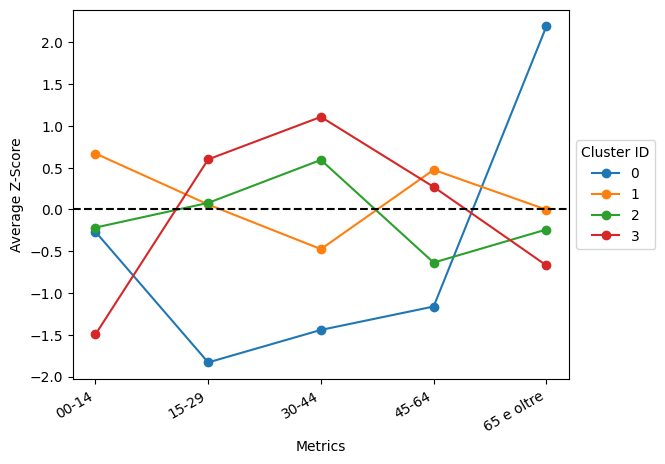

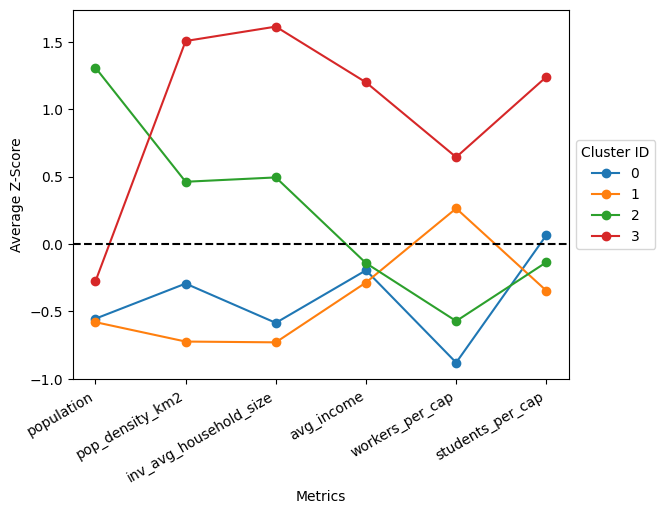

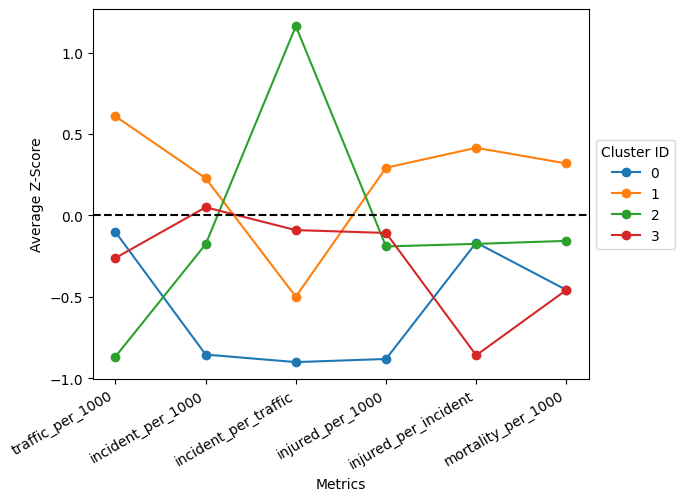

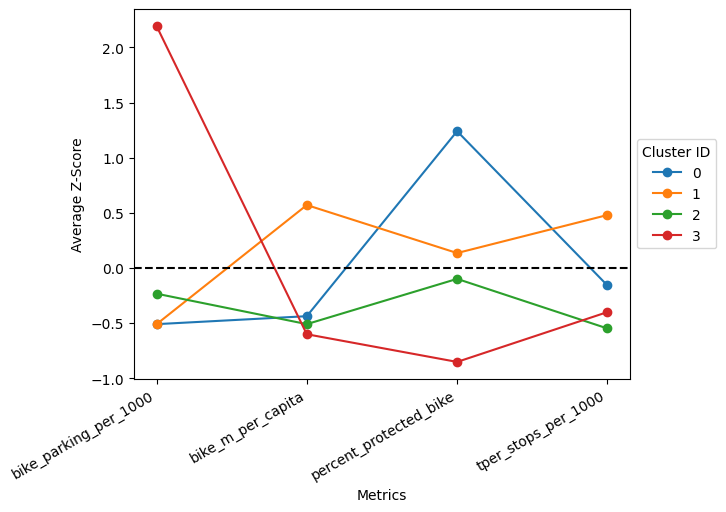

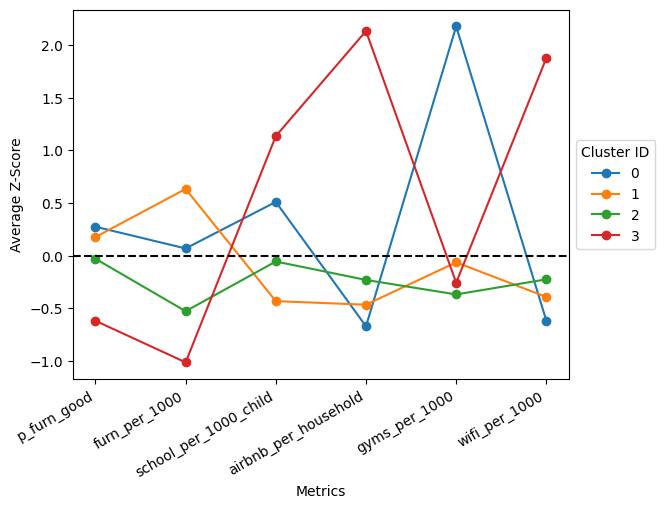

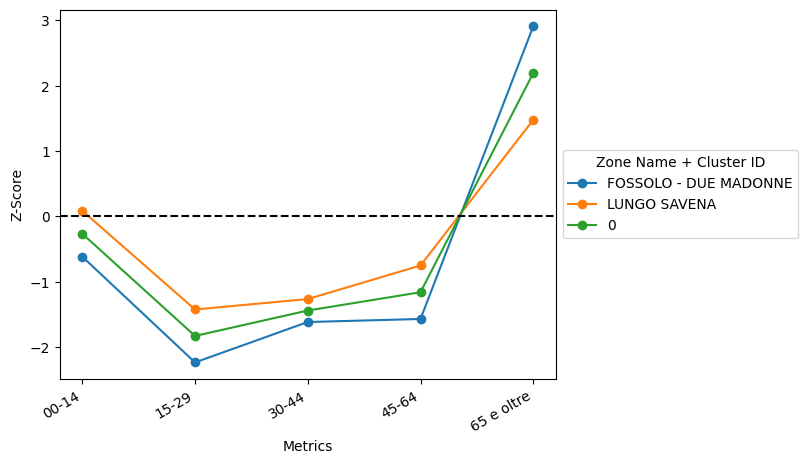

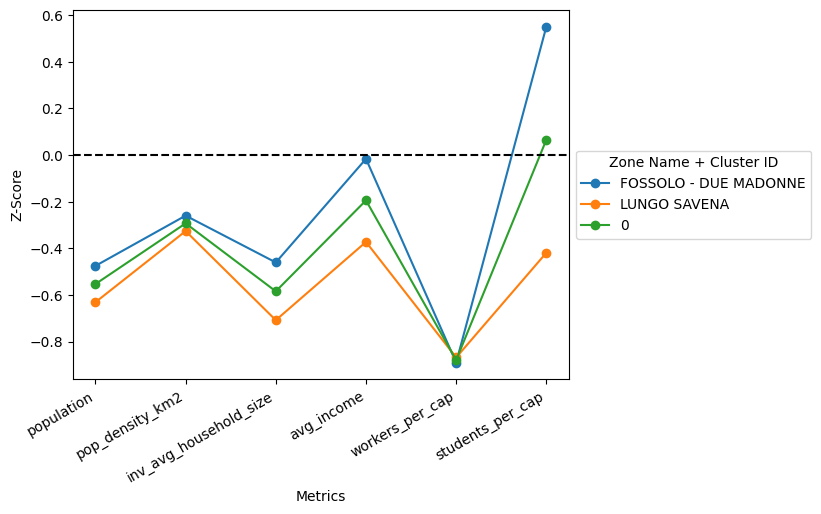

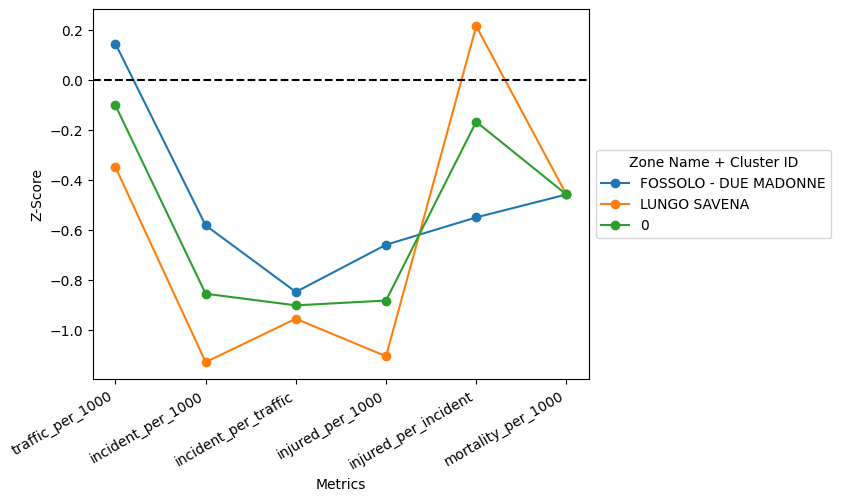

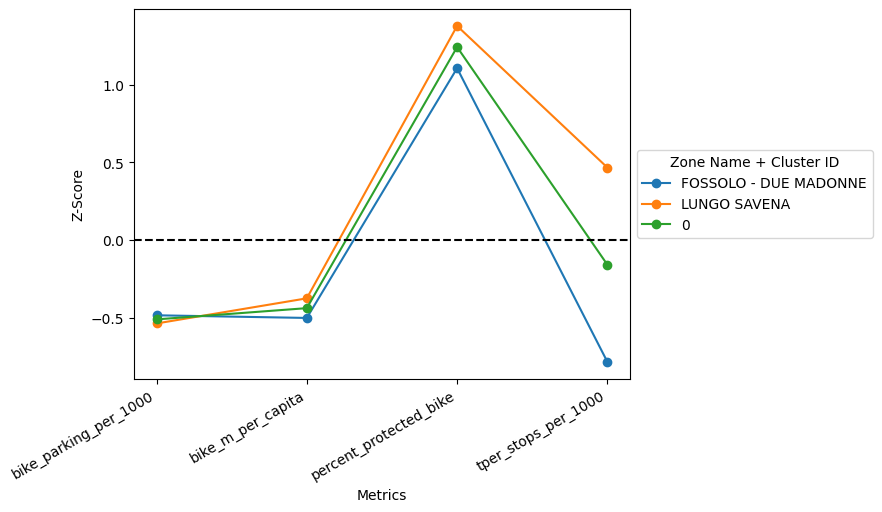

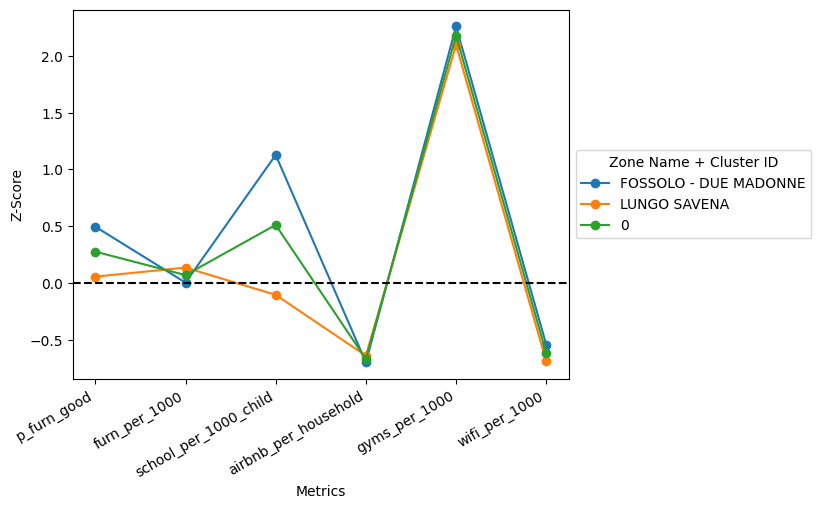

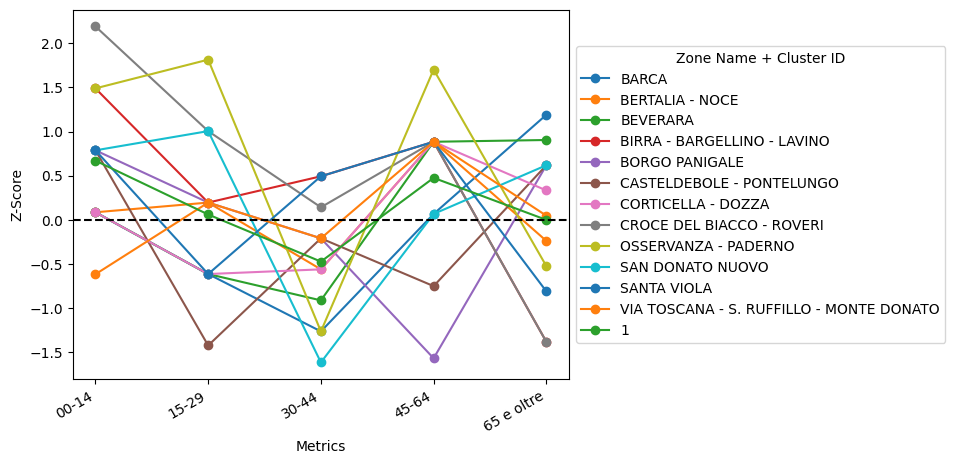

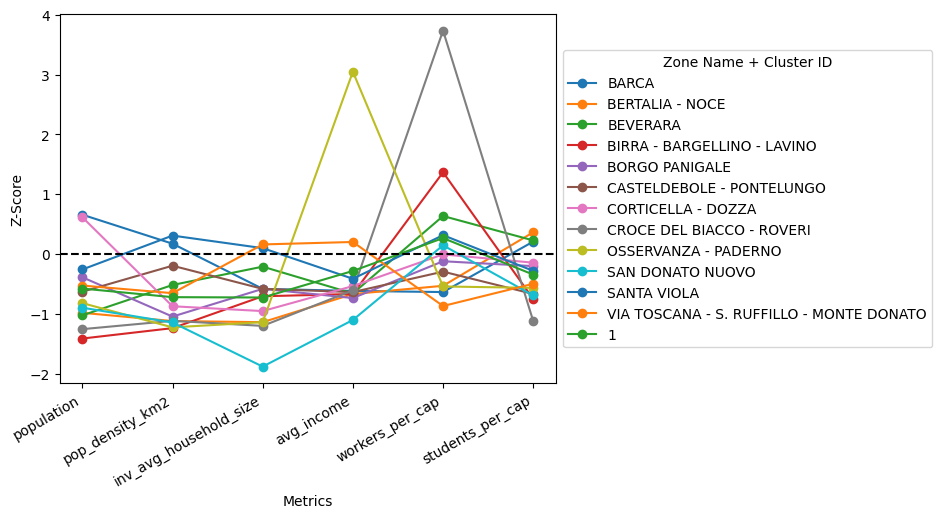

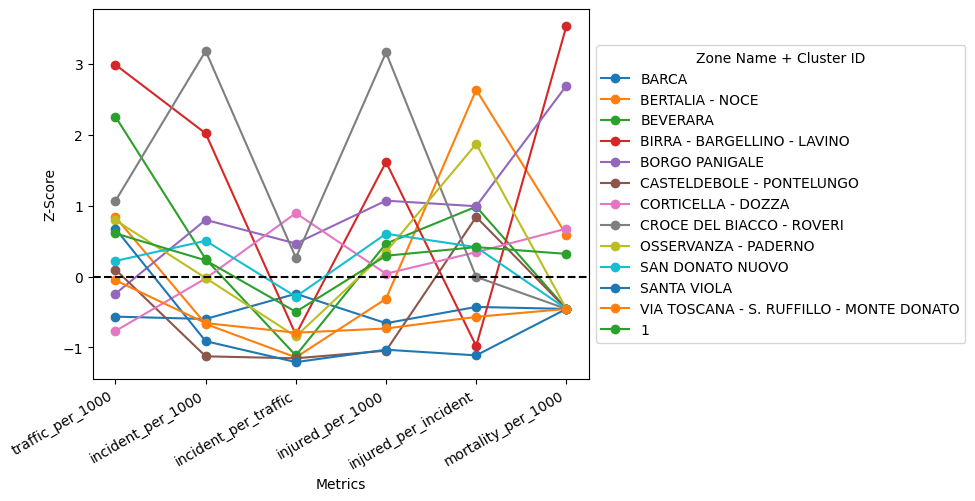

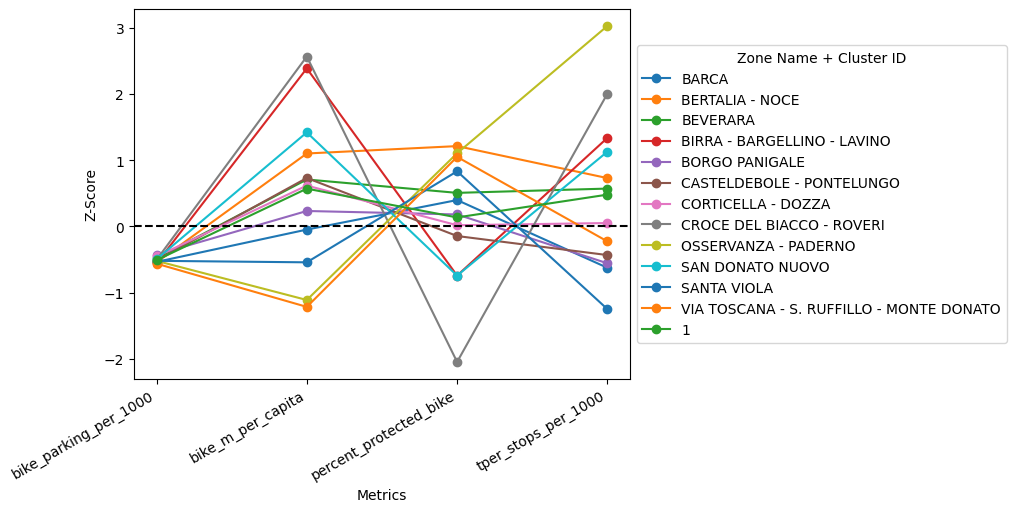

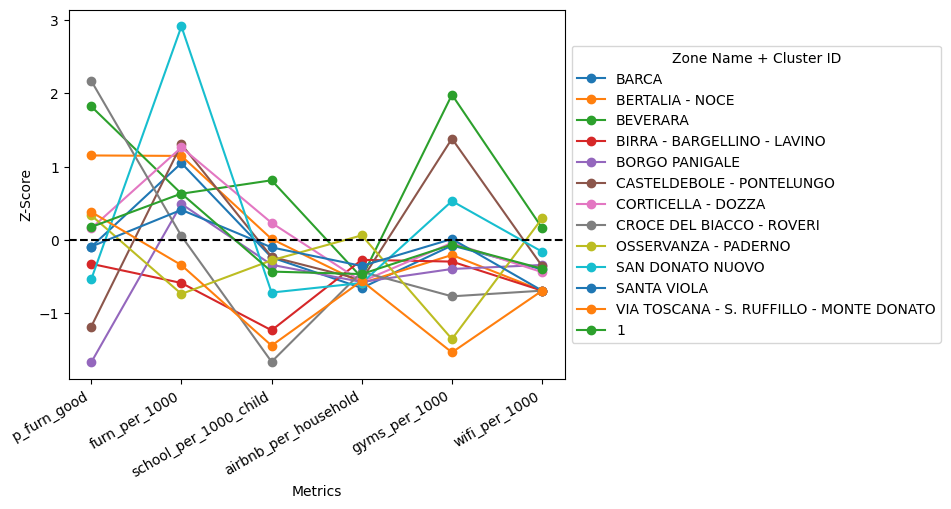

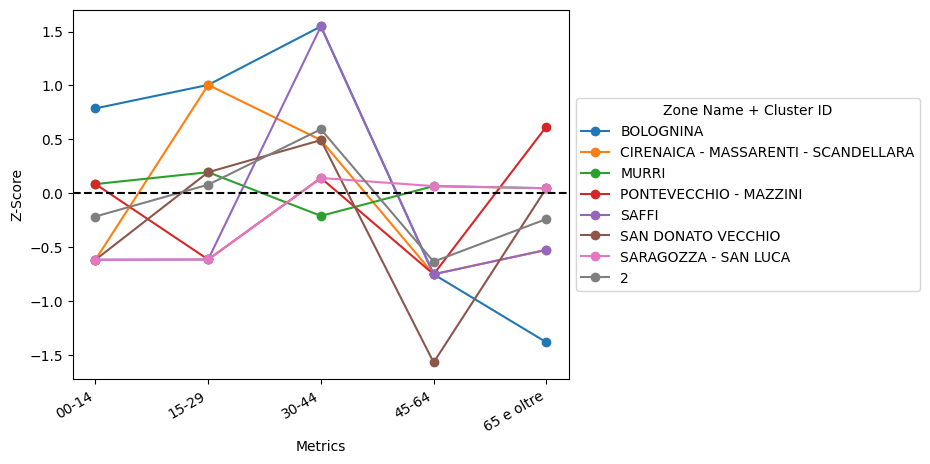

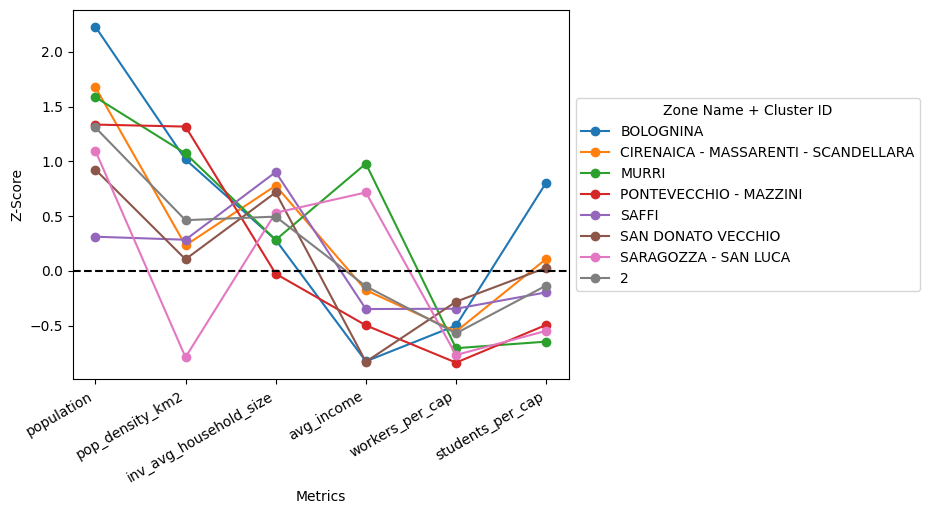

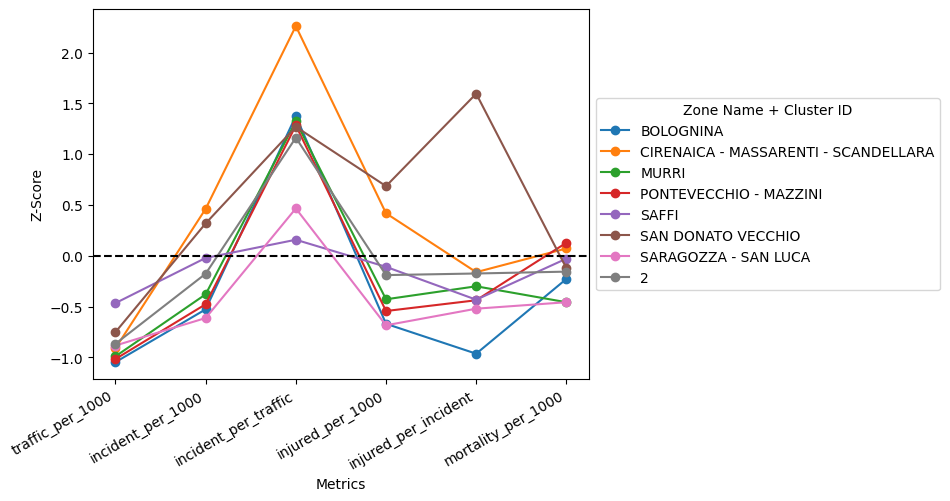

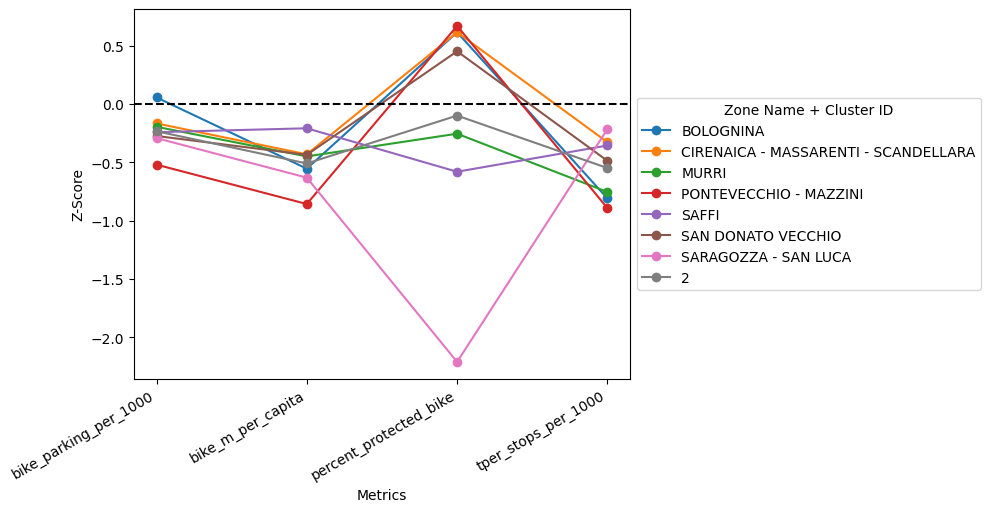

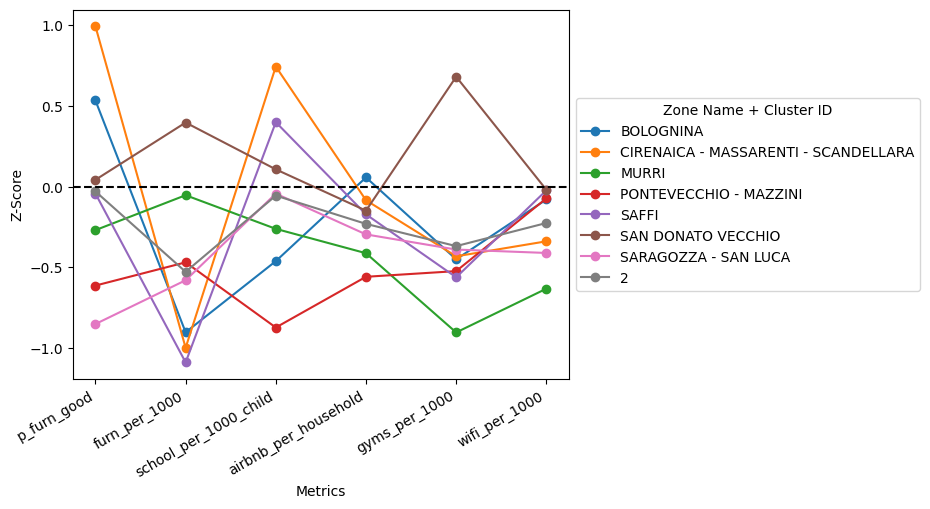

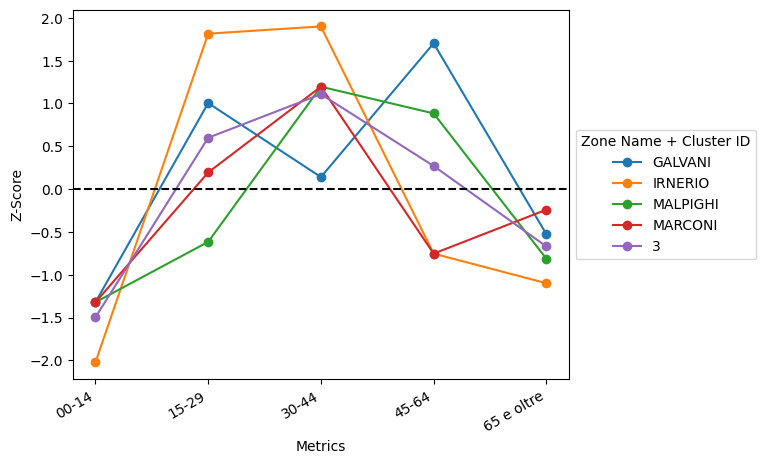

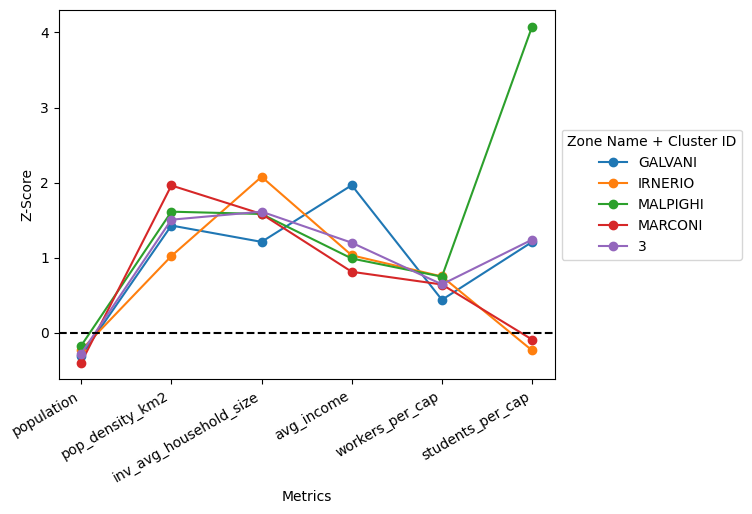

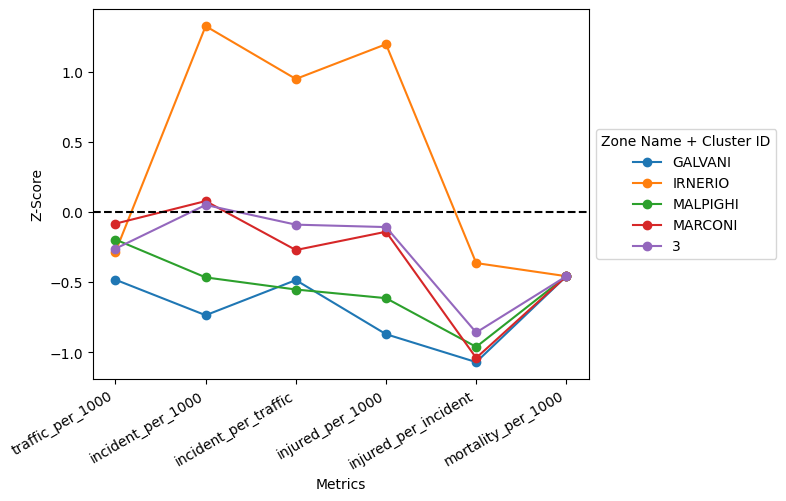

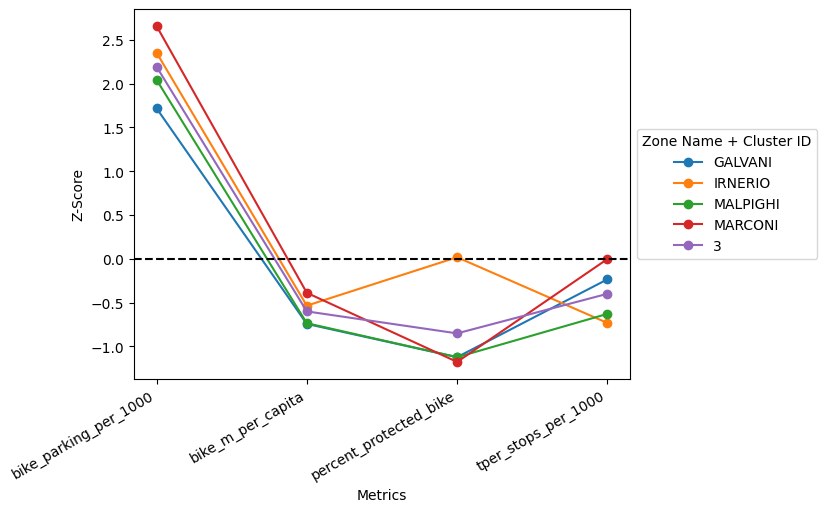

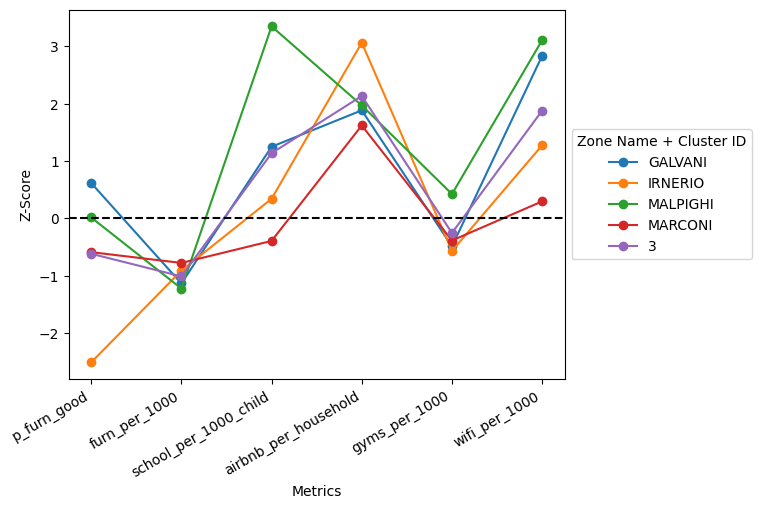

In [32]:
for id in ['x','0','1','2','3']:
    for metrics_list in [['00-14', '15-29', '30-44', '45-64', '65 e oltre'],
                        ['population', 'pop_density_km2', 'inv_avg_household_size', 'avg_income', 'workers_per_cap', 'students_per_cap'],
                        ['traffic_per_1000', 'incident_per_1000', 'incident_per_traffic', 'injured_per_1000', 'injured_per_incident', 'mortality_per_1000'], 
                        ['bike_parking_per_1000', 'bike_m_per_capita', 'percent_protected_bike', 'tper_stops_per_1000'],
                        ['p_furn_good', 'furn_per_1000', 'school_per_1000_child', 'airbnb_per_household', 'gyms_per_1000', 'wifi_per_1000']]:
            # display the line charts
            cluster_line_chart(cluster_data = df_z_clusters_4, 
                analysis_data = df_z, 
                cluster_id = id, 
                metrics = metrics_list)

In [36]:
# perform 4-cluster analysis on df_z_socioecon (socioecon metrics only) and display results
df_socio_clusters_4 = km_cluster_analysis(df_z_socioecon, 4, base_map_2019)
df_socio_clusters_4.geo.explore(column = 'Cluster ID', cmap = ['blue','orange','green','red'], tiles= "CartoDB positron", tooltip = ('zona_fiu','Cluster ID'))

In [ ]:
# display the centroids for the 4-cluster analysis of just socioeconomic metrics
df_socio_clusters_4.centroids

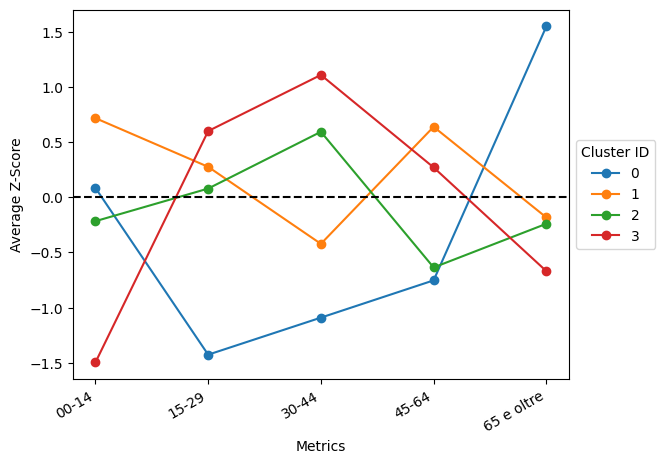

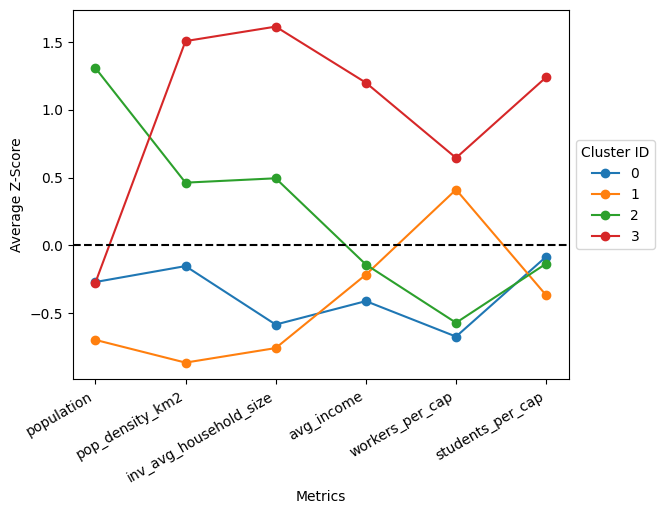

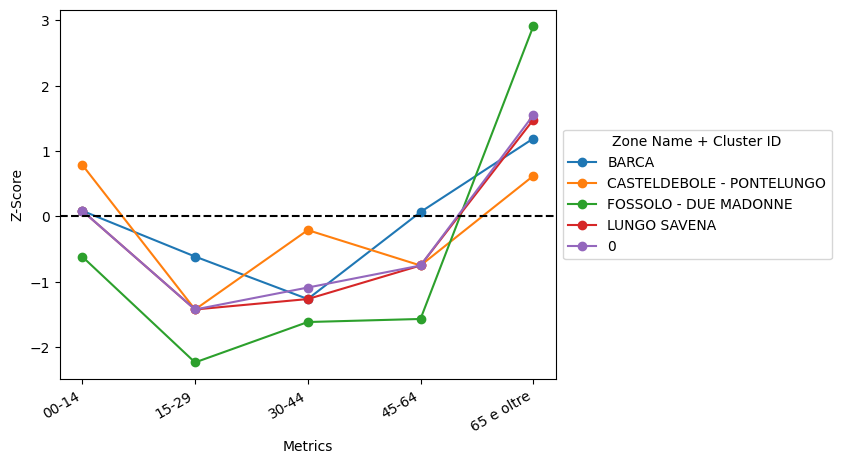

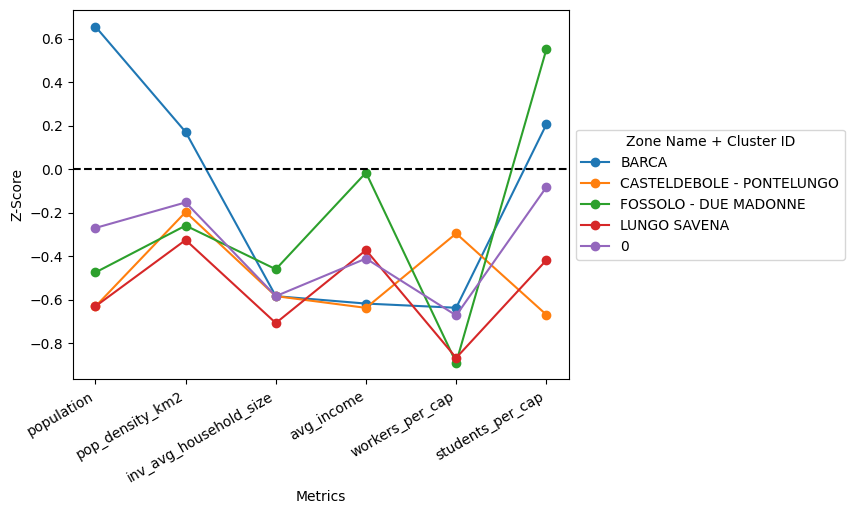

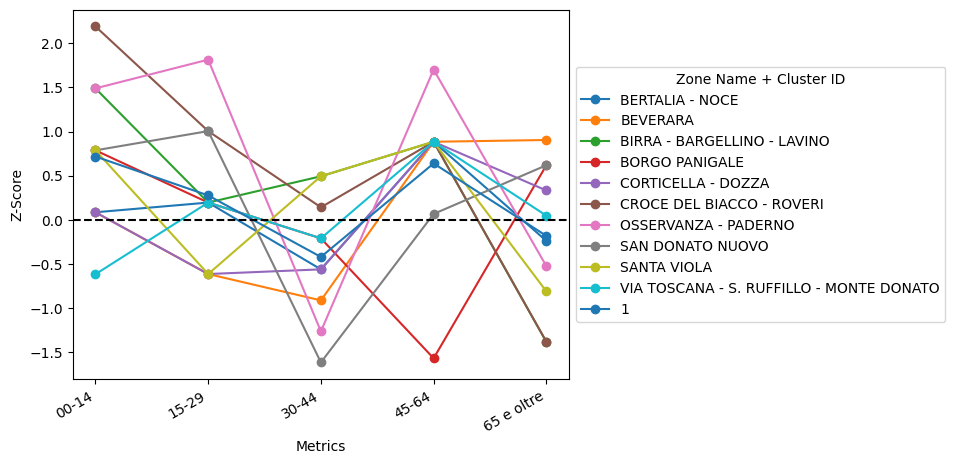

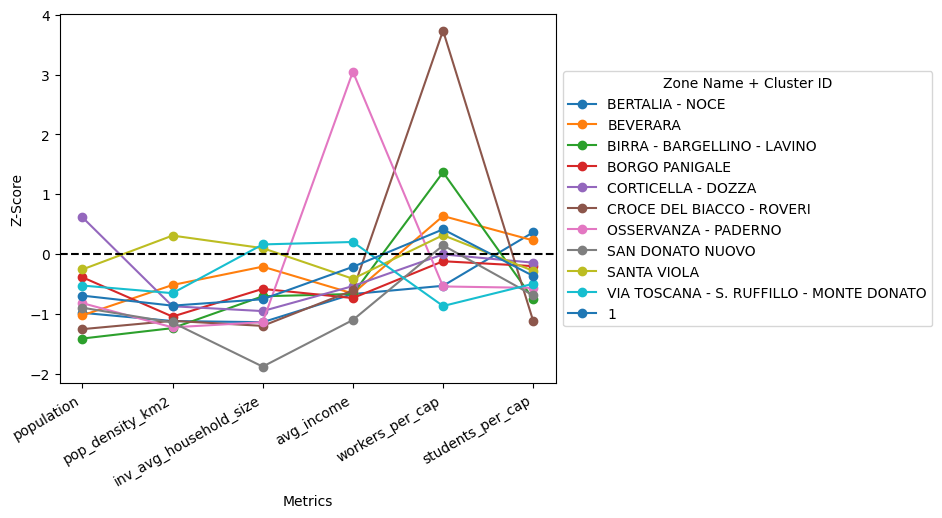

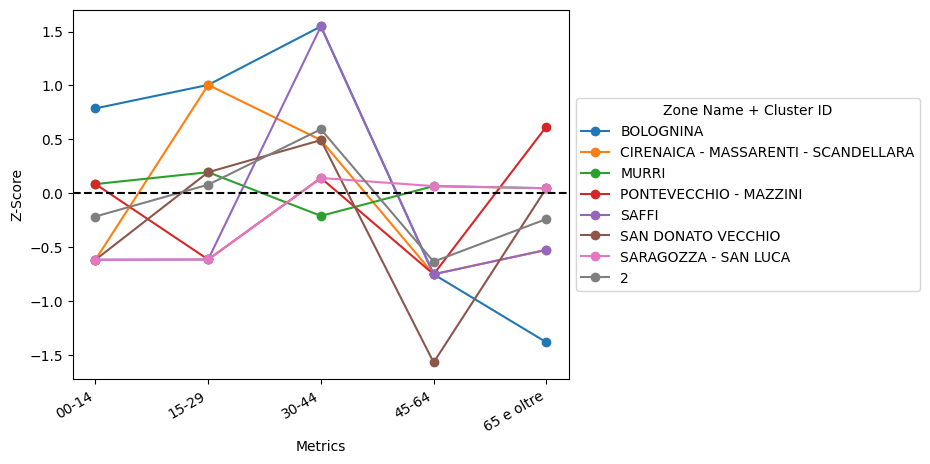

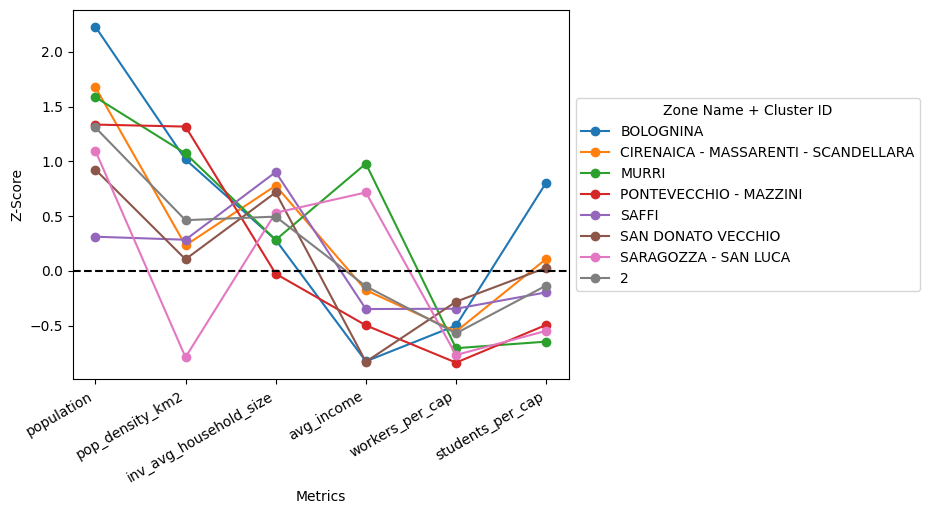

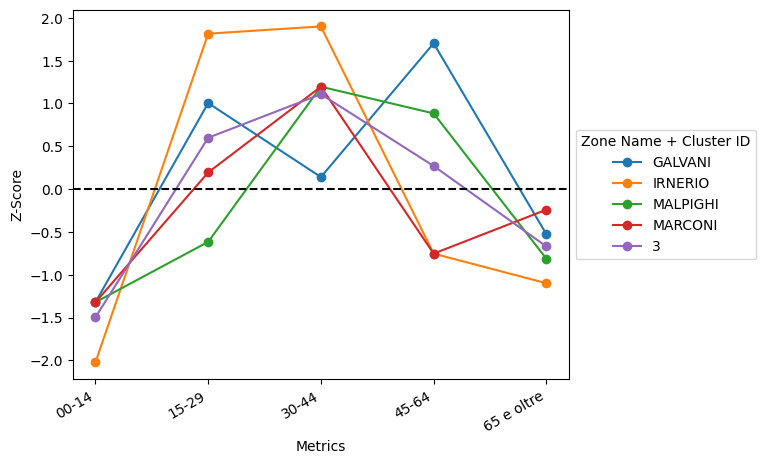

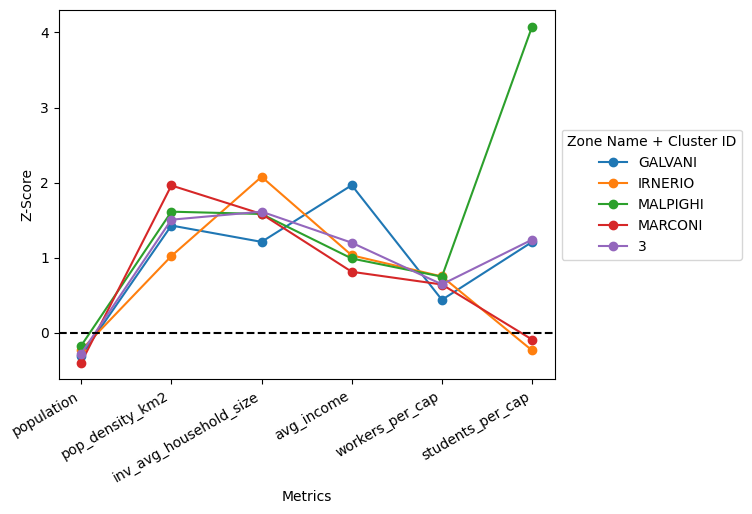

In [11]:
for id in ['x','0','1','2','3']:
    for metrics_list in [['00-14', '15-29', '30-44', '45-64', '65 e oltre'],
                        ['population', 'pop_density_km2', 'inv_avg_household_size', 'avg_income', 'workers_per_cap', 'students_per_cap']]:
            # display the line charts
            cluster_line_chart(cluster_data = df_socio_clusters_4, 
                analysis_data = df_z_socioecon, 
                cluster_id = id, 
                metrics = metrics_list)

In [5]:
# perform cluster analysis on df_z_transport (transport metrics only) and display results
# screeplot (the "elbow" graph) analysis of this dataset yielded a result that suggested 2 clusters was most meaningful 
df_transport_clusters_4 = km_cluster_analysis(df_z_transport, 4, base_map_2019)
df_transport_clusters_4.geo.explore(column = 'Cluster ID', cmap = ['blue','orange','green','red'], tiles= "CartoDB positron", tooltip = ('zona_fiu','Cluster ID'))
# should try to add more transportation related metrics and determine if this creates more meaningful insight

In [ ]:
# display the centroids for the 4-cluster analysis of just socioeconomic metrics
df_transport_clusters_4.centroids

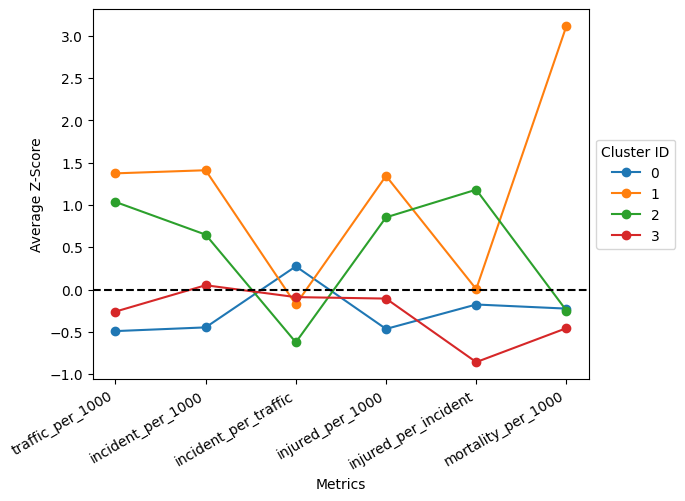

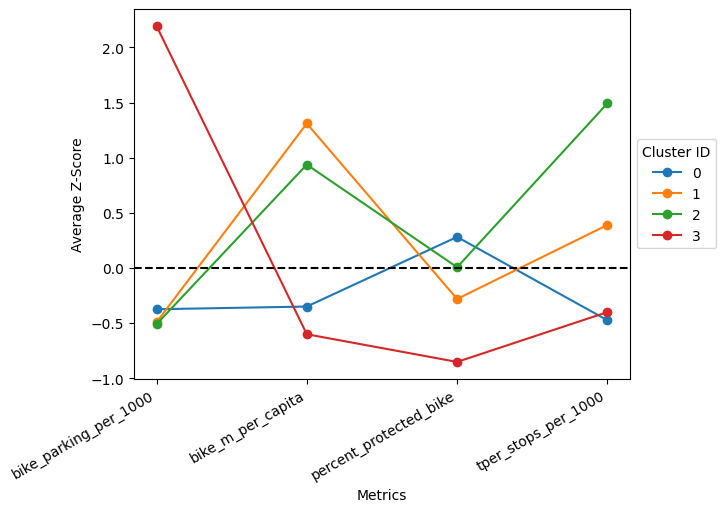

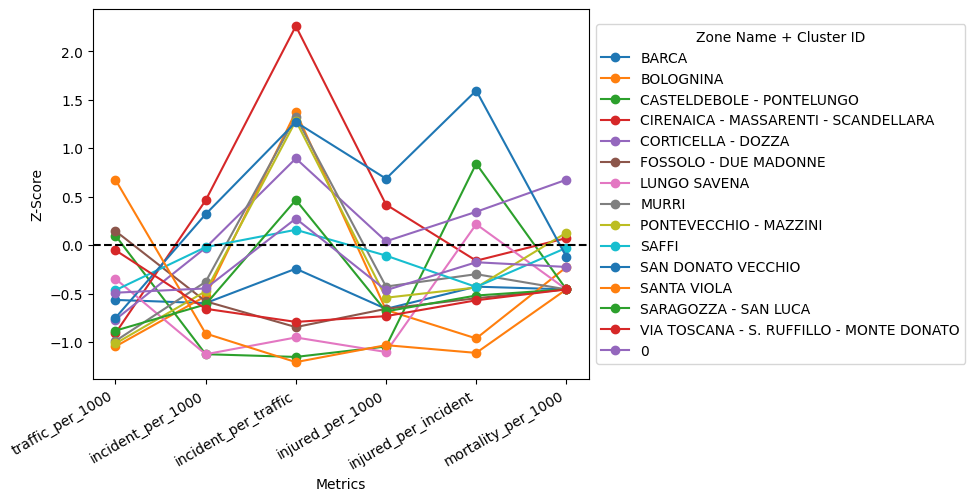

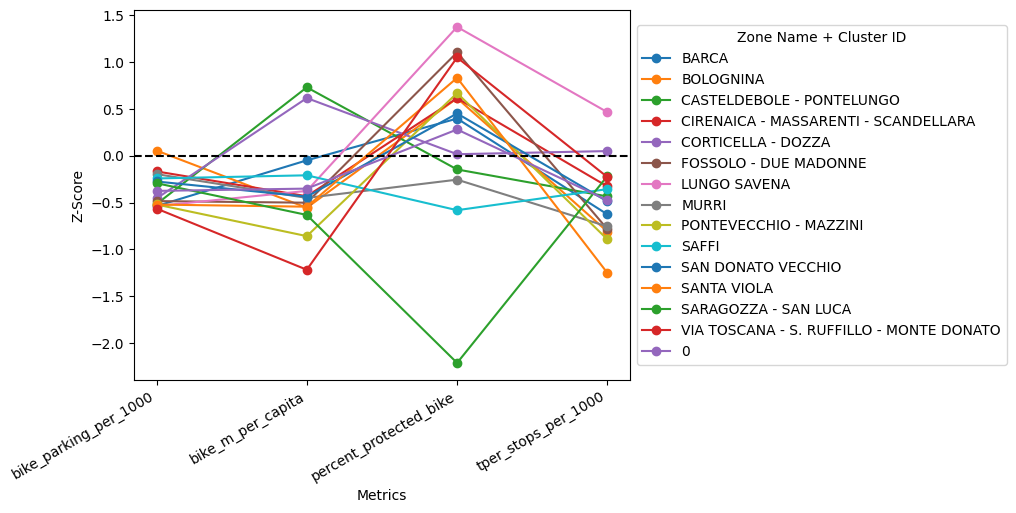

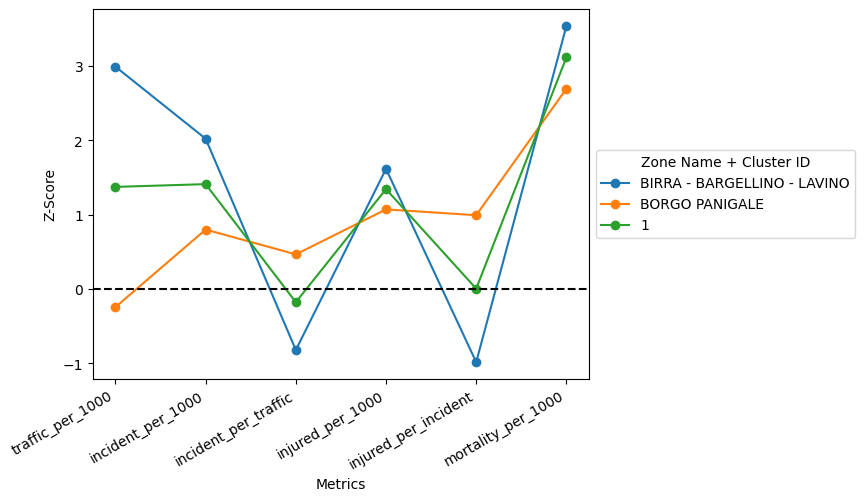

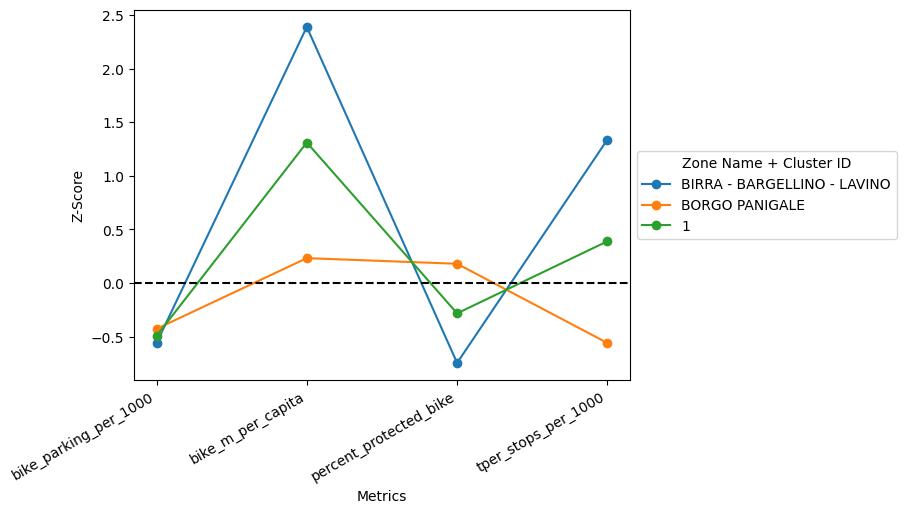

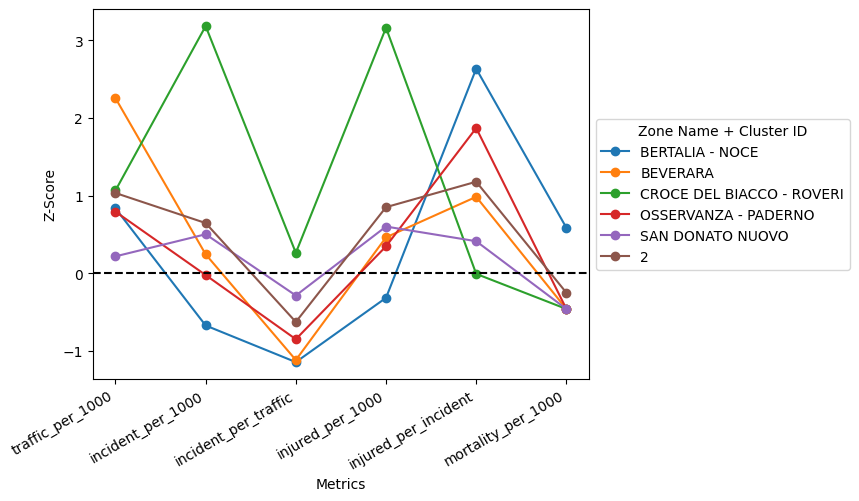

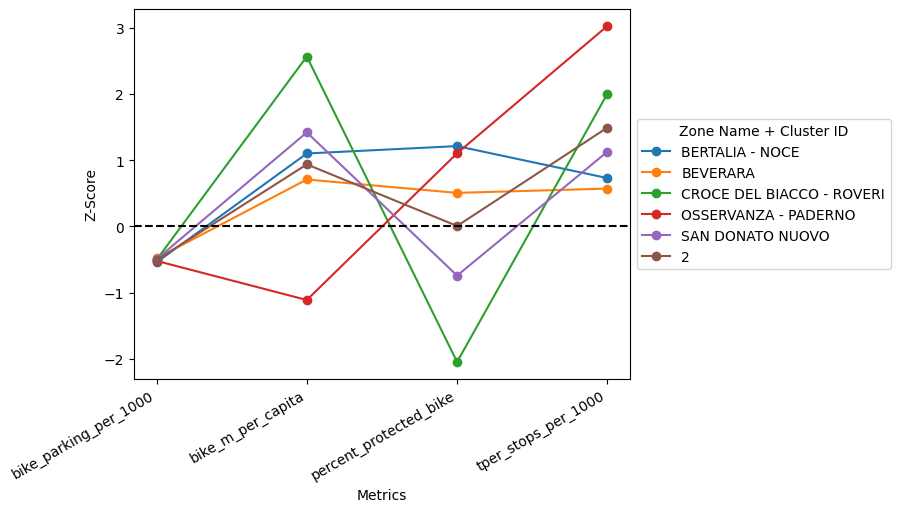

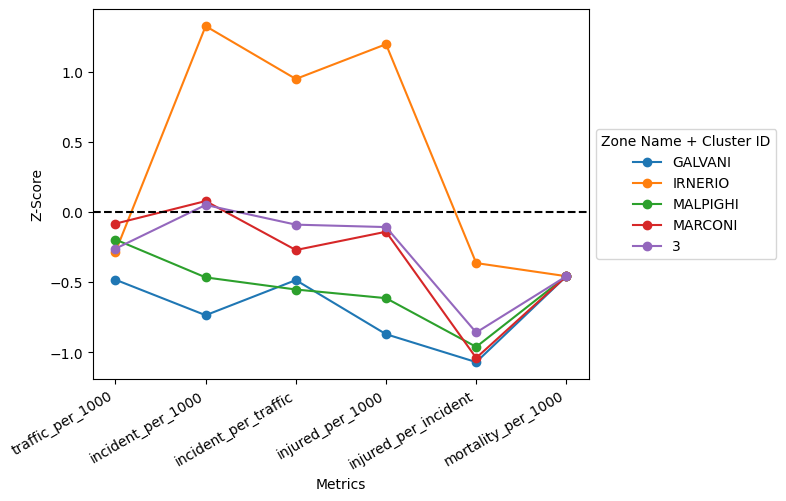

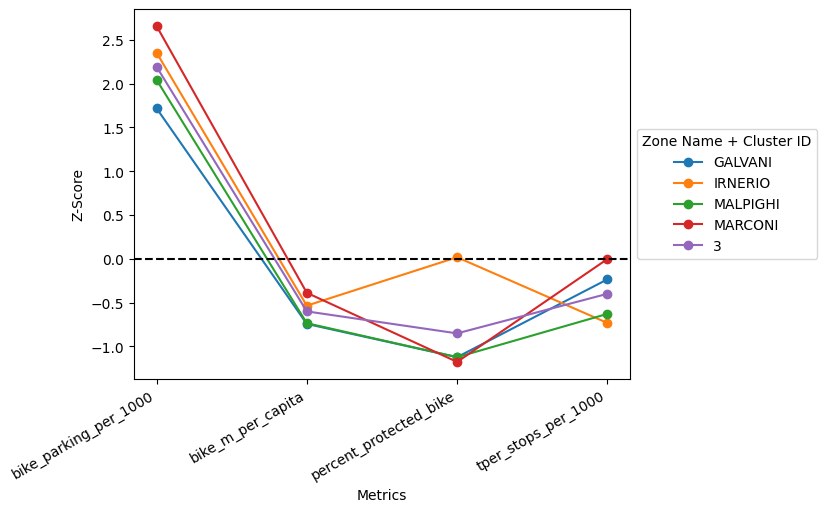

In [9]:
for id in ['x','0','1','2','3']:
    for metrics_list in [['traffic_per_1000', 'incident_per_1000', 'incident_per_traffic', 'injured_per_1000', 'injured_per_incident', 'mortality_per_1000'], 
                        ['bike_parking_per_1000', 'bike_m_per_capita', 'percent_protected_bike', 'tper_stops_per_1000']]:
            # display the line charts
            cluster_line_chart(cluster_data = df_transport_clusters_4, 
                analysis_data = df_z_transport, 
                cluster_id = id, 
                metrics = metrics_list)

In [12]:
# perform 4-cluster analysis on df_z_socioecon (socioecon metrics only) and display results
df_amenities_clusters_4 = km_cluster_analysis(df_z_amenities, 4, base_map_2019)
df_amenities_clusters_4.geo.explore(column = 'Cluster ID', cmap = ['blue','orange','green','red'], tiles= "CartoDB positron", tooltip = ('zona_fiu','Cluster ID'))

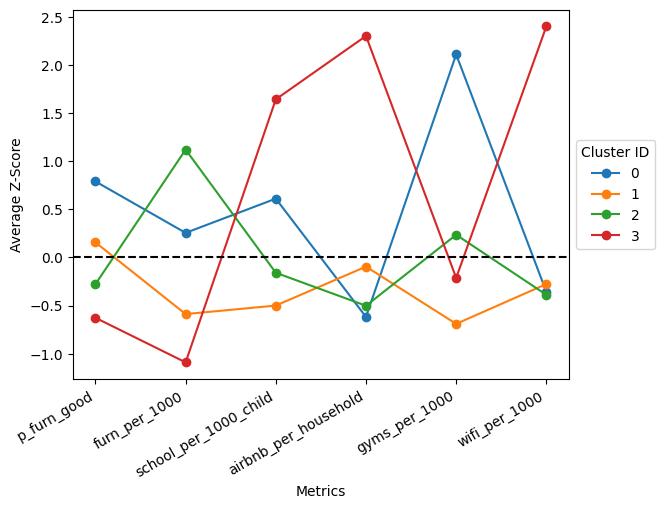

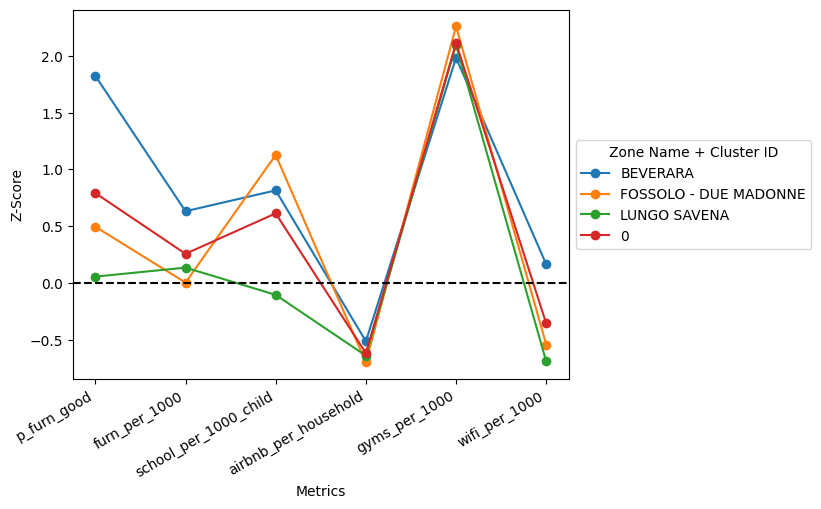

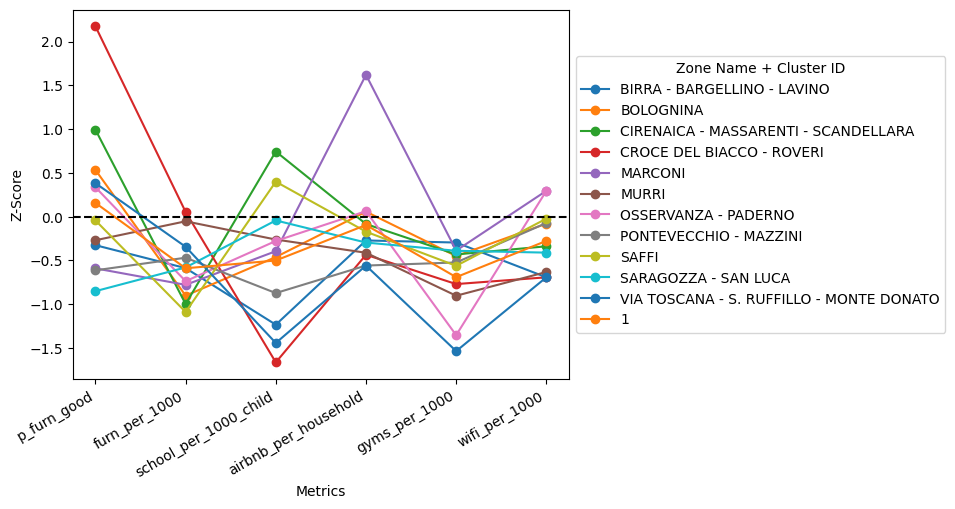

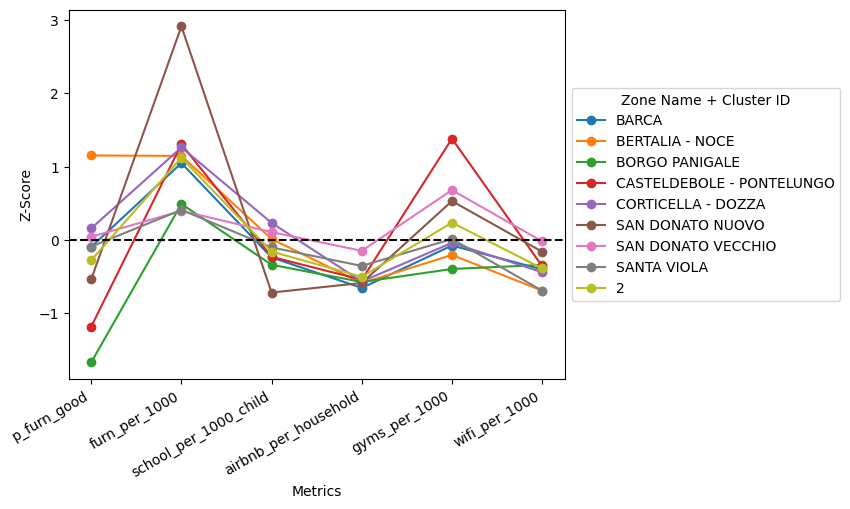

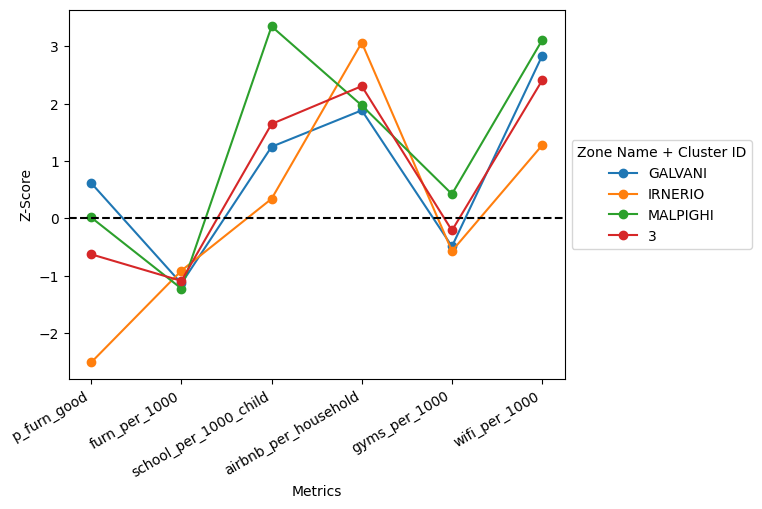

In [13]:
for id in ['x','0','1','2','3']:
    for metrics_list in [['p_furn_good', 'furn_per_1000', 'school_per_1000_child', 'airbnb_per_household', 'gyms_per_1000', 'wifi_per_1000']]:
            # display the line charts
            cluster_line_chart(cluster_data = df_amenities_clusters_4, 
                analysis_data = df_z_amenities, 
                cluster_id = id, 
                metrics = metrics_list)

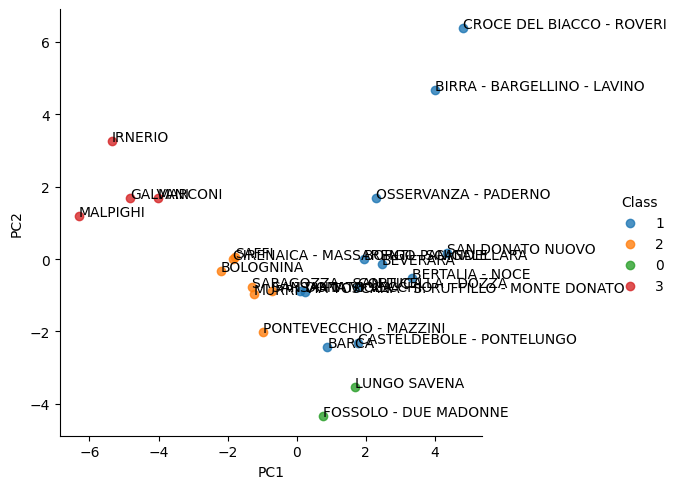

In [37]:
    # principal compoenents analysis
# set the resulting categories of the cluster analysis as dependent variable 
y = df_z_clusters_4.geo.reset_index()[['zona_fiu','Cluster ID']]

# define the principal component analysis from the standardized z-score data
pca = PCA().fit(df_z)

# output the summary statistics for each principal component
#pca_summary(pca, df_z)

# display the coefficients for the first principal component
#pca.components_[0]

# display the screeplot to determine the number of principal components to retain
# should use n-1 where n is where the "elbow" of the plot occurs - where the slope significantly changes
#screeplot(pca, df_z) 
    # based on result - retain the first 3 principal components

# display a scatterplot of the data to show the clusters in comparison to the first two principal components
pca_scatter(pca, df_z, y)
# the PCA analysis and the cluster analysis appear compatible

In [ ]:
# repeat the analysis with the socioeconomic metrics
y_socioecon = df_socio_clusters_4.geo.reset_index()[['zona_fiu','Cluster ID']]
pca_socioecon = PCA().fit(df_z_socioecon)
pca_scatter(pca_socioecon, df_z_socioecon, y_socioecon)

In [ ]:
# repeat the analysis with the transport metrics
y_transport = df_transport_clusters_3.geo.reset_index()[['zona_fiu','Cluster ID']]
pca_transport = PCA().fit(df_z_transport)
pca_scatter(pca_transport, df_z_transport, y_transport)
# conclusion as of 19/7 - the analysis of the combined dataset is still being driven heavily by the summary statistics 
# removing the summary stats leads to a weak grouping from the transport related metrics into two clusters - interior and exterior
# continue adding metrics

In [ ]:
# hierarchical clustering - provides ability to see further granularity and inter-group similarities / differences compared to k-means

# average linkage - compares using average distance between members of each cluster
linkage_matrix = linkage(df_z, method='average', metric='euclidean')
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='lastp', p=20, leaf_rotation=90., leaf_font_size=8., show_contracted=True, labels=df_z.index)
plt.title('Hierarchical Clustering Dendrogram with Complete Linkage')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [ ]:
# repeat the hierarchical clustering from above but only with the transport related metrics
linkage_matrix = linkage(df_z_transport, method='average', metric='euclidean')
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='lastp', p=20, leaf_rotation=90., leaf_font_size=8., show_contracted=True, labels=df_z_transport.index)
plt.title('Hierarchical Clustering Dendrogram with Complete Linkage')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()